In [1]:
!pip install gensim

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import nltk

from gensim.models import Word2Vec

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,\
    classification_report, confusion_matrix, ConfusionMatrixDisplay

In [56]:
labels = []
tokens = []

x = []
y = []

In [57]:
corpus = [
    "Red apples are a favorite in the spring.",
    "The blue sky makes me happy in the summer.",
    "Green salads are perfect for a calm fall day.",
    "Yellow chocolate is a delightful winter treat.",
    "Purple flowers bloom in the spring.",
    "I am happy when it rains.",
    "Orange tea is soothing in the winter.",
    "The sun makes me excited.",
    "I feel calm when it snows.",
    "I am confused when it's cloudy.",
    "Surprised by the pink sunset.",
    "Coffee in the morning makes me happy."
]

corpus

['Red apples are a favorite in the spring.',
 'The blue sky makes me happy in the summer.',
 'Green salads are perfect for a calm fall day.',
 'Yellow chocolate is a delightful winter treat.',
 'Purple flowers bloom in the spring.',
 'I am happy when it rains.',
 'Orange tea is soothing in the winter.',
 'The sun makes me excited.',
 'I feel calm when it snows.',
 "I am confused when it's cloudy.",
 'Surprised by the pink sunset.',
 'Coffee in the morning makes me happy.']

In [58]:
stopwords = set(stopwords.words('english'))

stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [59]:
def remove_stopwords(sentence):
    words = nltk.word_tokenize(sentence)
    
    words = [word.lower() for word in words if word.isalnum() and word.lower() not in stopwords]
    
    return words

In [60]:
tokenized_corpus = [remove_stopwords(sentence) for sentence in corpus]

tokenized_corpus[0]

['red', 'apples', 'favorite', 'spring']

https://towardsdatascience.com/a-beginners-guide-to-word-embedding-with-gensim-word2vec-model-5970fa56cc92

- vector_size: The number of dimensions of the embeddings and the default is 100.
- window: The maximum distance between a target word and words around the target word. The default window is 5.
- min_count: The minimum count of words to consider when training the model; words with occurrence less than this count will be ignored. The default for min_count is 5.
- workers: It defines the number of CPU cores to use for training. Setting it to -1 will use all available cores.
- sg: The training algorithm, either CBOW(0) or skip gram(1). The default training algorithm is CBOW.

In [61]:
model = Word2Vec(
    sentences = tokenized_corpus,
    vector_size = 100, window=5, 
    min_count=1, workers=-1
)

model

In [62]:
for word in model.wv.key_to_index:
    tokens.append(model.wv[word])

    labels.append(word)

In [63]:
print(labels)

['makes', 'happy', 'winter', 'spring', 'calm', 'salads', 'chocolate', 'yellow', 'day', 'fall', 'perfect', 'summer', 'green', 'coffee', 'sky', 'blue', 'favorite', 'apples', 'delightful', 'morning', 'treat', 'purple', 'sunset', 'pink', 'surprised', 'cloudy', 'confused', 'snows', 'feel', 'excited', 'sun', 'soothing', 'tea', 'orange', 'rains', 'bloom', 'flowers', 'red']


In [64]:
tokens = np.array(tokens)

print(tokens)

[[-5.3622725e-04  2.3643136e-04  5.1033497e-03 ... -7.0415605e-03
   9.0145587e-04  6.3925339e-03]
 [-8.6196875e-03  3.6657380e-03  5.1898835e-03 ... -2.3915148e-03
  -9.5100943e-03  4.5058788e-03]
 [ 9.4563962e-05  3.0773198e-03 -6.8126451e-03 ...  5.1259040e-04
   8.2130842e-03 -7.0190406e-03]
 ...
 [ 7.9434970e-03 -6.4516068e-03  5.7945312e-03 ...  8.3017135e-03
  -3.5923254e-03 -9.8455455e-03]
 [ 5.3829267e-03  9.8106898e-03 -7.0547746e-03 ...  8.8351145e-03
  -9.4265700e-04 -8.0324174e-04]
 [ 2.2270130e-03 -7.5334953e-03  5.6283558e-03 ...  3.9910283e-03
  -7.2031878e-03 -2.1236371e-03]]


In [65]:
tsne_model = TSNE(n_components=2, random_state=42)

tsne_model

TSNE(random_state=42)

In [66]:
new_values = tsne_model.fit_transform(tokens)

new_values

array([[ 1.4625571 , -0.18473902],
       [ 2.114809  , -1.4198296 ],
       [ 1.8551272 , -0.6415837 ],
       [ 2.4990394 , -0.8473846 ],
       [ 1.1251533 , -1.1679659 ],
       [ 2.6737063 , -0.35936487],
       [ 1.105563  , -0.64488226],
       [ 1.537183  , -0.79697365],
       [ 2.310562  , -0.39650247],
       [ 1.4233553 , -0.16382702],
       [ 1.6592789 , -0.29108968],
       [ 1.911775  , -0.64621985],
       [ 1.1155438 , -0.8821673 ],
       [ 1.199703  , -1.491472  ],
       [ 2.368727  , -1.1909783 ],
       [ 2.0459616 , -1.7967643 ],
       [ 0.93549865, -0.18065089],
       [ 2.4135273 , -1.1199951 ],
       [ 1.8322071 , -0.9002825 ],
       [ 1.4857029 , -0.7050417 ],
       [ 2.0146444 , -0.5915444 ],
       [ 1.1881709 , -1.1626065 ],
       [ 1.8352165 , -1.5389807 ],
       [ 1.4750957 , -1.6090047 ],
       [ 1.990739  ,  0.18569799],
       [ 0.9811856 , -1.115506  ],
       [ 1.0752003 , -0.8665717 ],
       [ 2.3557296 , -0.50880045],
       [ 0.88046664,

In [67]:
for value in new_values:
    x.append(value[0])
    y.append(value[1])

In [68]:
print(f'x: {x}', f'y: {y}', sep='\n\n')

x: [1.4625571, 2.114809, 1.8551272, 2.4990394, 1.1251533, 2.6737063, 1.105563, 1.537183, 2.310562, 1.4233553, 1.6592789, 1.911775, 1.1155438, 1.199703, 2.368727, 2.0459616, 0.93549865, 2.4135273, 1.8322071, 1.4857029, 2.0146444, 1.1881709, 1.8352165, 1.4750957, 1.990739, 0.9811856, 1.0752003, 2.3557296, 0.88046664, 1.6738788, 2.1102567, 1.7146775, 1.4106706, 1.2329057, 1.8258842, 1.5102639, 2.380673, 1.2057918]

y: [-0.18473902, -1.4198296, -0.6415837, -0.8473846, -1.1679659, -0.35936487, -0.64488226, -0.79697365, -0.39650247, -0.16382702, -0.29108968, -0.64621985, -0.8821673, -1.491472, -1.1909783, -1.7967643, -0.18065089, -1.1199951, -0.9002825, -0.7050417, -0.5915444, -1.1626065, -1.5389807, -1.6090047, 0.18569799, -1.115506, -0.8665717, -0.50880045, -0.36152327, -1.2615881, -0.72942835, -1.6716434, -0.1745822, 0.0588101, -0.3143965, -0.12973584, -0.61178684, -0.74869496]


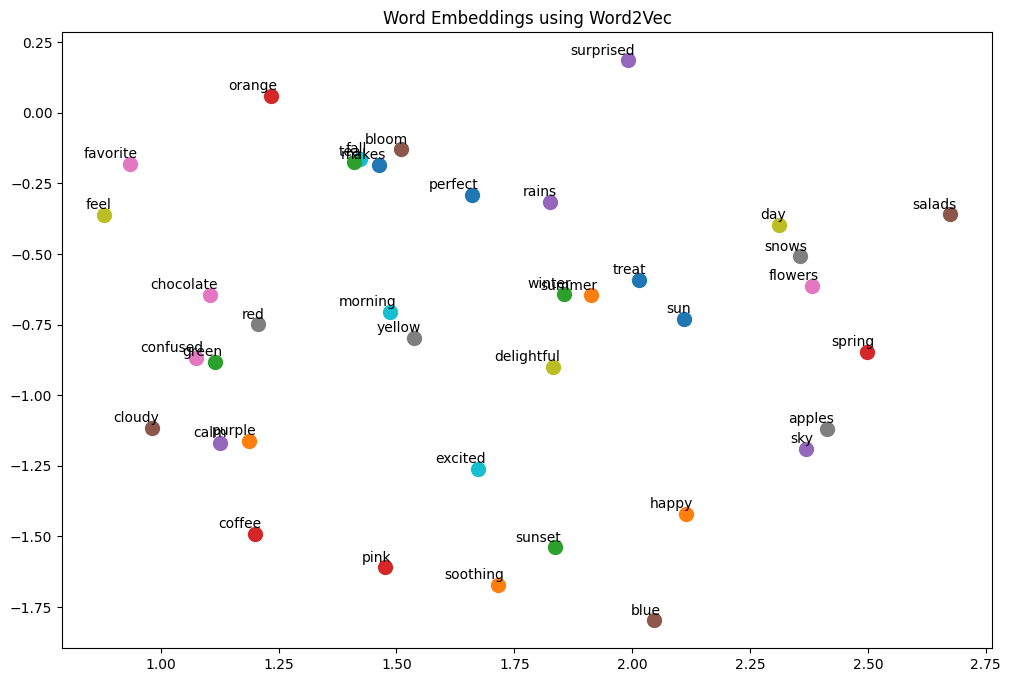

In [69]:
plt.figure(figsize=(12, 8))

plt.title('Word Embeddings using Word2Vec')

for i in range(len(x)):
    plt.scatter(x[i], y[i], s=100)

    plt.annotate(
        labels[i],
        xy=(x[i], y[i]),
        xytext=(5, 2),
        textcoords='offset points',
        ha='right',
        va='bottom'
    )

plt.show()

In [70]:
model.wv.most_similar('summer', topn=5)

[('sun', 0.18189512193202972),
 ('winter', 0.17272792756557465),
 ('salads', 0.16694682836532593),
 ('tea', 0.15600773692131042),
 ('delightful', 0.13264630734920502)]

In [71]:
model.wv.most_similar('spring', topn=5)

[('sky', 0.17826788127422333),
 ('flowers', 0.16390635073184967),
 ('salads', 0.13149002194404602),
 ('day', 0.07497557997703552),
 ('happy', 0.06797593086957932)]

In [72]:
model.wv.most_similar('blue', topn=5)

[('sunset', 0.19613032042980194),
 ('soothing', 0.15878427028656006),
 ('happy', 0.12300864607095718),
 ('rains', 0.10277824103832245),
 ('pink', 0.08300335705280304)]

- If the words are highly similar, the similarity score will be close to 1.
- If the words are dissimilar, the similarity score will be close to -1.
- If the words have no apparent similarity, the score will be close to 0.

In [83]:
model.wv.similarity('sun', 'summer')

0.18189514

In [84]:
model.wv.similarity('salads', 'surprised')

0.042779144

In [85]:
model.wv.similarity('sun', 'snows')

0.142399

In [86]:
model.wv.similarity('blue', 'red')

-0.07998557

In [87]:
model.wv.similarity('blue', 'happy')

0.12300865

In [88]:
model.wv.doesnt_match(['yellow', 'blue', 'salads'])

'salads'

In [89]:
model.wv.doesnt_match(['spring', 'snows', 'summer'])

'snows'

In [90]:
df = pd.read_csv("./datasets/cleaned_reviews.csv")

df.head(10)

,text,label
0,product is good but price is to high after pur...,2
1,not gudpoor cloth,0
2,did not show correct reading even once,0
3,4 star for short power chord thanks flipkart f...,2
4,issue is mop road rotatingits off worst qualit...,0
5,product it is not very good not perfectly join...,1
6,very cheap quality damaged pieces waste of money,0
7,this product its good but so lightweight not o...,0
8,product so very good quality but delivered to ...,1
9,it gave negative result in covid test but when...,0


In [91]:
x_train, x_test, y_train, y_test = train_test_split(
    df['text'], df['label'], test_size=0.2, random_state=42)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((13896,), (13896,), (3474,), (3474,))

In [92]:
word2vec_model = Word2Vec(
    sentences=[document.split() for document in x_train], 
    vector_size=100, window=5, 
    min_count=5, workers=4
)

word2vec_model

In [93]:
def document_vectorizer(document, model):
    words = document.split()
    
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    
    if len(word_vectors) == 0:
        return np.zeros(100)
    
    word_vectors = np.array(word_vectors)
    
    return word_vectors.mean(axis=0)

In [94]:
clf = GaussianNB()

clf

GaussianNB()

In [95]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

text_clf = Pipeline([
    ('word_embeddings', FunctionTransformer(
        lambda x: np.array([document_vectorizer(doc, word2vec_model) for doc in x]))),
    ('classifier', clf)
])

text_clf

Pipeline(steps=[('word_embeddings',
                 FunctionTransformer(func=<function <lambda> at 0x7f79e6f1a050>)),
                ('classifier', GaussianNB())])

In [96]:
text_clf.fit(x_train, y_train)

Pipeline(steps=[('word_embeddings',
                 FunctionTransformer(func=<function <lambda> at 0x7f79e6f1a050>)),
                ('classifier', GaussianNB())])

In [97]:
y_pred = text_clf.predict(x_test)

y_pred

array([0, 0, 0, ..., 2, 2, 2])

In [98]:
def summarize_classification(y_test, y_pred):

    acc = accuracy_score(y_test, y_pred, normalize=True)
    num_acc = accuracy_score(y_test, y_pred, normalize=False)
    prec = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    print("Length of testing data: ", len(y_test))
    print("accuracy_count : " , num_acc)
    print("accuracy_score : " , acc)
    print("precision_score : " , prec)
    print("recall_score : ", recall)

In [99]:
summarize_classification(y_test, y_pred)

Length of testing data:  3474
accuracy_count :  2013
accuracy_score :  0.5794473229706391
precision_score :  0.5880006882411764
recall_score :  0.5794473229706391


In [100]:
report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.65      0.45      0.53      1168
           1       0.56      0.53      0.54      1184
           2       0.56      0.77      0.65      1122

    accuracy                           0.58      3474
   macro avg       0.59      0.58      0.57      3474
weighted avg       0.59      0.58      0.57      3474



https://www.himandthyme.com/understanding-and-visualizing-word-embeddings-with-glove-and-word2vec/

In [101]:
from sklearn.manifold import TSNE

def visualize_embeddings(embeddings, words):
    tsne = TSNE(n_components=2, random_state=0, perplexity = len(words) - 1)
    
    embedding_vectors = np.array([embeddings[word] for word in words])
    
    two_d_embeddings = tsne.fit_transform(embedding_vectors)

    plt.figure(figsize=(12, 8))
    
    for i, word in enumerate(words):
        x, y = two_d_embeddings[i, :]
        plt.scatter(x, y)
        plt.annotate(
            word, (x, y), xytext=(5, 2), 
            textcoords="offset points", ha="right", va="bottom"
        )
    plt.show()

##### We cannot see the words clearly so we will see using 3D visualization

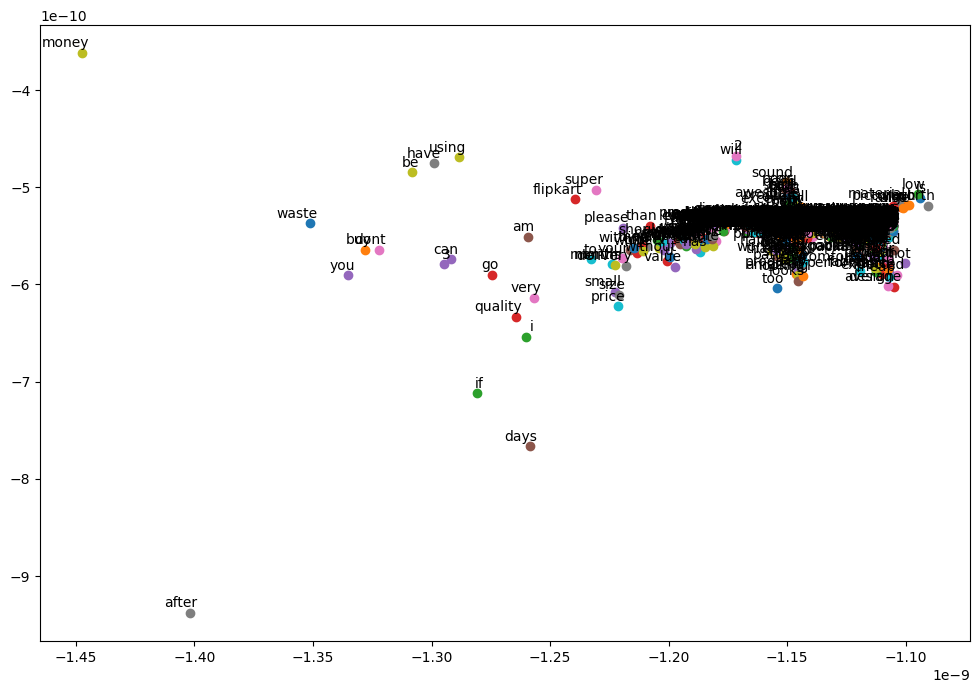

In [102]:
word2vec_words = word2vec_model.wv.index_to_key

visualize_embeddings(word2vec_model.wv, word2vec_words)

In [104]:
import plotly.express as px

def visualize_embeddings_3d(embeddings, words):
    tsne = TSNE(n_components=3, random_state=0, perplexity=len(words)-1)
    embedding_vectors = np.array([embeddings[word] for word in words])
    three_d_embeddings = tsne.fit_transform(embedding_vectors)

    fig = px.scatter_3d(
        x=three_d_embeddings[:, 0],
        y=three_d_embeddings[:, 1],
        z=three_d_embeddings[:, 2],
        text=words,
        title="3D Interactive Embedding Visualization",
        labels={'x': 'Dimension 1', 'y': 'Dimension 2', 'z': 'Dimension 3'},
    )

    fig.update_traces(marker=dict(size=5))

    fig.show()

### TODO Recording:

- Please zoom into the plot so you can see more detail
- Then pan till you see at least some similar words close to each other in space

In [105]:
word2vec_words = word2vec_model.wv.index_to_key

visualize_embeddings_3d(word2vec_model.wv, word2vec_words)

In [106]:
from sklearn.metrics.pairwise import cosine_similarity

def get_similarity_scores(word, model):
    print(f"Similarity scores for the word '{word}':")
    
    word_vector = model.wv[word].reshape(1, -1)

    similarities = cosine_similarity(word_vector, model.wv.vectors)

    similarity_df = pd.DataFrame({
        'word': model.wv.index_to_key,
        'similarity_score': similarities[0]
    })

    sorted_similarity_df = similarity_df.sort_values(by='similarity_score', ascending=False)

    return sorted_similarity_df

In [107]:
similarity_scores_df = get_similarity_scores('sad', word2vec_model)

similarity_scores_df.head(10)

Similarity scores for the word 'sad':


,word,similarity_score
1235,sad,1.000000
132,item,0.969995
845,plus,0.961455
1004,producti,0.961380
189,im,0.960241
1587,cushion,0.959969
1668,unsatisfied,0.959683
347,fully,0.958292
248,camera,0.957688
390,bed,0.957492


In [108]:
similarity_scores_df = get_similarity_scores('happy', word2vec_model)

similarity_scores_df.head(10)

Similarity scores for the word 'happy':


,word,similarity_score
74,happy,1.000000
125,satisfied,0.941803
70,really,0.875339
152,love,0.874763
65,am,0.867070
189,im,0.851758
19,with,0.841416
147,experience,0.836367
1543,impressed,0.831747
118,amazing,0.830167


In [109]:
similarity_scores_df = get_similarity_scores('day', word2vec_model)

similarity_scores_df.head(10)

Similarity scores for the word 'day':


,word,similarity_score
115,day,1.000000
134,first,0.973570
199,4,0.972525
485,weeks,0.971269
220,last,0.968531
130,now,0.967429
46,time,0.966537
204,times,0.965185
303,15,0.961351
409,started,0.961307


In [110]:
similarity_scores_df = get_similarity_scores('summer', word2vec_model)

similarity_scores_df.head(10)

Similarity scores for the word 'summer':


,word,similarity_score
1598,summer,1.000000
332,most,0.989216
336,useless,0.988444
691,instead,0.988132
399,model,0.987508
639,complete,0.987456
1006,indian,0.986575
999,wrong,0.986029
883,lots,0.985521
360,these,0.985140
